In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import utils

In [5]:
datainput = pd.read_csv("dataML/crop_production.csv")
datainput 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
datainput = datainput.dropna()

In [8]:
# preprocessing

Production = (datainput.iloc[:,6]).values
Production=Production.reshape(242361,1)
Production

array([[2.00000e+03],
       [1.00000e+00],
       [3.21000e+02],
       ...,
       [1.62500e+04],
       [5.97899e+05],
       [8.80000e+01]])

In [10]:
X = datainput[['State_Name', 'District_Name', 'Crop_Year', 
               'Season','Crop', 'Area']].values

#label encoder to categorical data 
labelencoder_X = preprocessing.LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:, 0])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])
X[:,3] = labelencoder_X.fit_transform(X[:, 3])
X[:,4] = labelencoder_X.fit_transform(X[:, 4])
X

array([[0, 427, 2000, 1, 2, 1254.0],
       [0, 427, 2000, 1, 74, 2.0],
       [0, 427, 2000, 1, 95, 102.0],
       ...,
       [32, 471, 2014, 4, 106, 324.0],
       [32, 471, 2014, 5, 95, 279151.0],
       [32, 471, 2014, 5, 102, 175.0]], dtype=object)

In [12]:
X = X.astype(float)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')   
x2 = columnTransformer.fit_transform(X)
x2

<242361x38 sparse matrix of type '<class 'numpy.float64'>'
	with 1448772 stored elements in Compressed Sparse Row format>

In [13]:
datainput.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [15]:
datainput.shape

(242361, 7)

In [16]:
datainput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [17]:
datainput.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [18]:
datainput.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


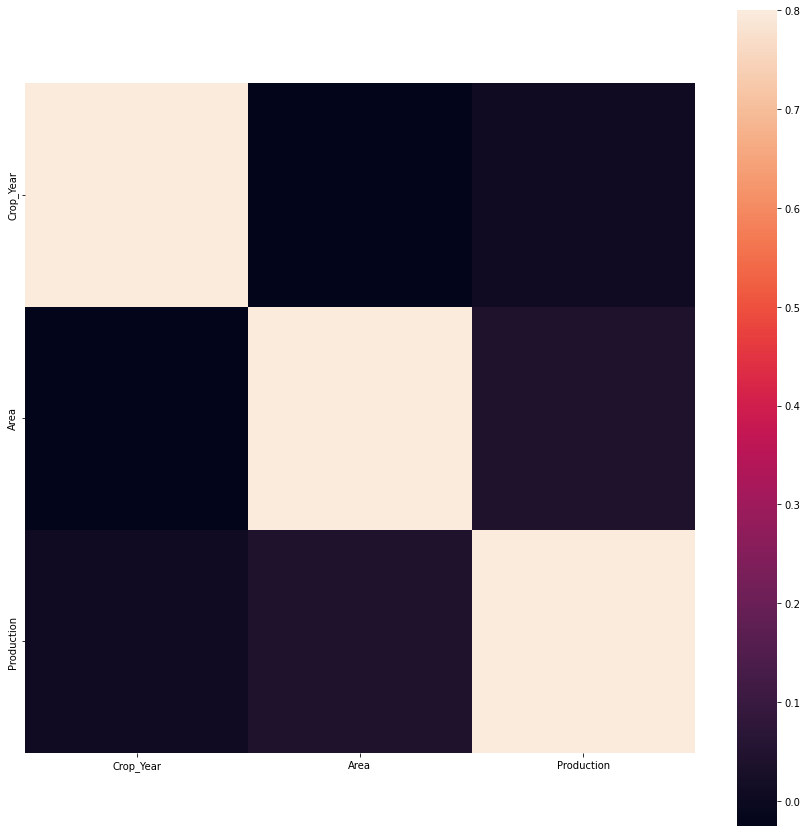

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = datainput.corr()
fig= plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [22]:
datainput = datainput[datainput['Crop_Year']>= 2004]
datainput

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.70,805.85
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12
39,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Black pepper,85.00,15.86
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.50,197.90
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.00,463.00
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.00,597899.00


In [23]:
datainput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149238 entries, 36 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     149238 non-null  object 
 1   District_Name  149238 non-null  object 
 2   Crop_Year      149238 non-null  int64  
 3   Season         149238 non-null  object 
 4   Crop           149238 non-null  object 
 5   Area           149238 non-null  float64
 6   Production     149238 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.1+ MB


In [28]:
# datainput = datainput.join(pd.get_dummies(datainput['State_Name']))
# datainput = datainput.join(pd.get_dummies(datainput['District_Name']))
# datainput = datainput.join(pd.get_dummies(datainput['Season']))
# datainput = datainput.join(pd.get_dummies(datainput['Crop']))
datainput


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,...,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.70,805.85,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Black pepper,85.00,15.86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.50,197.90,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.00,463.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.00,597899.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
datainput['Yeild'] = datainput['Production']/datainput['Area']
datainput

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,...,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds,Yeild
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1,0,0,...,0,0,0,0,0,0,0,0,0,1.370797
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.70,805.85,1,0,0,...,0,0,0,0,0,0,0,0,0,0.637187
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,1,0,0,...,0,0,0,0,0,0,0,0,0,6.084312
39,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Black pepper,85.00,15.86,1,0,0,...,0,0,0,0,0,0,0,0,0,0.186588
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.50,197.90,1,0,0,...,0,0,0,0,0,0,0,0,0,0.289539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,0,0,0,...,0,0,0,0,0,0,0,0,0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.00,463.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00,0,0,0,...,0,0,0,0,0,0,0,0,0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.00,597899.00,0,0,0,...,0,0,0,0,0,0,0,0,0,2.141848


In [30]:
datainput = datainput.drop('Production', axis=1)

In [31]:
# dropping unnecessary columns
datainput = datainput.drop('State_Name', axis=1)
datainput = datainput.drop('District_Name', axis=1)
datainput = datainput.drop('Season', axis=1)
datainput = datainput.drop('Crop', axis=1)
datainput

,Crop_Year,Area,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,...,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds,Yeild
36,2004,52.94,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.370797
37,2004,1264.70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.637187
38,2004,66.42,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.084312
39,2004,85.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.186588
40,2004,683.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.289539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.617647
246087,2014,627.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.738437
246088,2014,324.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.154321
246089,2014,279151.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.141848


In [33]:
# preprocessing
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = datainput[['Area']].values.astype(float)
x
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

x_scaled

datainput['Area'] = x_scaled
datainput



,Crop_Year,Area,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,...,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds,Yeild
36,2004,0.000052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.370797
37,2004,0.001250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.637187
38,2004,0.000066,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.084312
39,2004,0.000084,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.186588
40,2004,0.000676,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.289539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,0.000302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.617647
246087,2014,0.000620,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.738437
246088,2014,0.000320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.154321
246089,2014,0.276004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.141848


In [34]:
datainput.head()

,Crop_Year,Area,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,...,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds,Yeild
36,2004,0.000052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.370797
37,2004,0.001250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.637187
38,2004,0.000066,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.084312
39,2004,0.000084,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.186588
40,2004,0.000676,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.289539


In [35]:
# filling empty values with mean
datainput = datainput.fillna(datainput.mean())

In [36]:
# train and test 

from sklearn.model_selection import train_test_split

In [37]:
a = datainput

In [38]:
b= datainput['Yeild']

In [40]:
a = datainput.drop('Yeild', axis=1)

In [41]:
len(a.columns)

766

In [42]:
a.columns

Index(['Crop_Year', 'Area', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       ...
       'Sweet potato', 'Tapioca', 'Tea', 'Tobacco', 'Tomato',
       'Total foodgrain', 'Turmeric', 'Urad', 'Wheat', 'other oilseeds'],
      dtype='object', length=766)

In [43]:
a.head()

,Crop_Year,Area,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,...,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Urad,Wheat,other oilseeds
36,2004,0.000052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,0.001250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,0.000066,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,0.000084,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,0.000676,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

        Crop_Year      Area  Andaman and Nicobar Islands  Andhra Pradesh  \
241715       2014  0.000027                            0               0   
41166        2005  0.000189                            0               0   
137438       2013  0.273185                            0               0   
140503       2012  0.000980                            0               0   
206103       2007  0.005564                            0               0   
...           ...       ...                          ...             ...   
200180       2011  0.000151                            0               0   
171002       2007  0.000003                            0               0   
219113       2008  0.000070                            0               0   
242406       2006  0.001669                            0               0   
203609       2004  0.000775                            0               0   

        Arunachal Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  \
241715            

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.fit_transform(a_test)

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 2, random_state=0, n_estimators= 100)
regr.fit(a_train,b_train)
b_pred = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE = ',mse(b_pred, b_test))
print('MAE = ',mae(b_pred, b_test))
print('R2 Score = ',r2_score(b_pred, b_test))






MSE =  1091515.475430408
MAE =  50.58464564886528
R2 Score =  -3.9257625402186305
